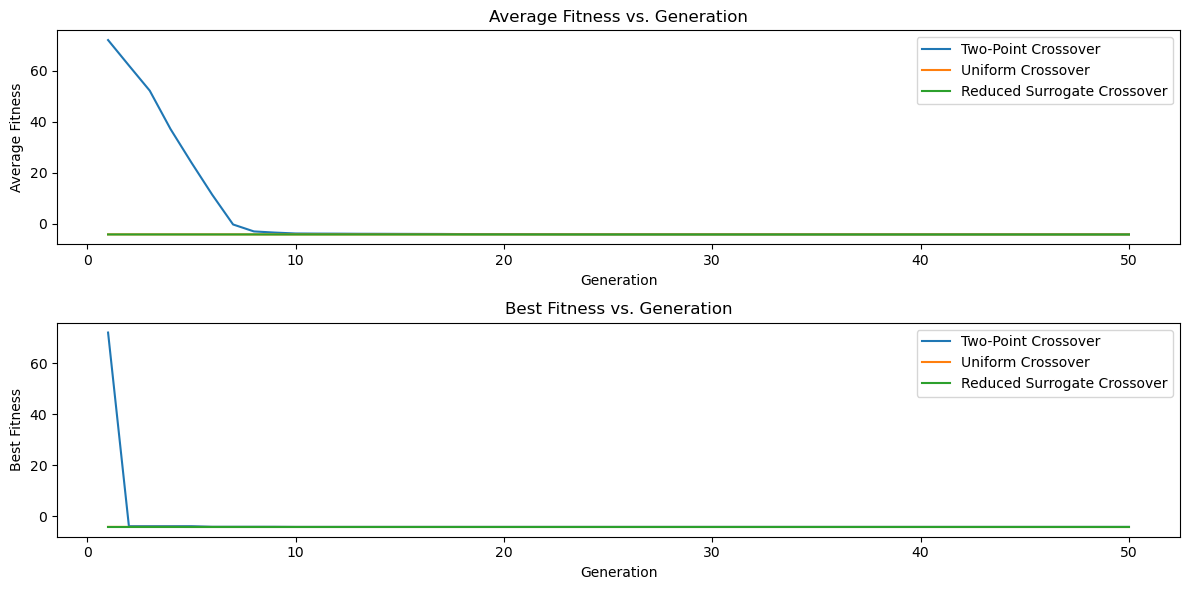

TypeError: unsupported operand type(s) for /: 'list' and 'int'

<Figure size 1200x600 with 0 Axes>

In [59]:
import random
import pandas as pd
import matplotlib.pyplot as plt


# Initialize an empty DataFrame
data = pd.DataFrame(columns=['Generation', 'Crossover', 'BestFitness', 'AverageFitness'])
pop_size = 40
generation_szie = 50
x1_lower_bound = 0
x1_upper_bound = 6
x2_lower_bound = 0
x2_upper_bound = 4

H1 = "01********10********"
H2 = "00********11********"


mutation_prob = 0.1 #1/l
pc = 0.8

uniform_cross_over_prob = 0.5


binary_string_length = 20 #10 bits

def evaluate_fitness(genome1, genome2):
    fitness = 0
    if H1 in genome1 or H1 in genome2:
        print("YES BABY")
        fitness = fitness_evaluation(genome1, genome2)
        
    if H2 in genome1 or H2 in genome2:
        print("Yes baby")
        fitness = fitness_evaluation(genome1, genome2)
    return fitness


def fitness_function(x1, x2):
    return (x1**2 + x2 - 11)**2 - (x1 + x2 - 7)**2

def fitness_evaluation(binary_1, binary_2):
   
    number1 = int(binary_1, 2)
    number2 = int(binary_2, 2)
    
    range_width_x1 = x1_upper_bound - x1_lower_bound
    range_width_x2 = x2_upper_bound - x2_lower_bound
    new_x1 = (number1 / ((2 ** len(binary_1)) - 1)) * range_width_x1
    new_x2 = (number2 / ((2 ** len(binary_2)) - 1)) * range_width_x2
    
    fitness = fitness_function(new_x1,new_x2)
    return fitness
    

def uniform_crossover(parent1, parent2):
    offspring_x1_1 = ''
    for bit1, bit2 in zip(parent1[0], parent2[0]):
        if random.random() < 0.5:
            offspring_x1_1 += bit1
        else:
            offspring_x1_1 += bit2
    offspring_x1_2 = ''.join(['1' if bit == '0' else '0' for bit in offspring_x1_1])
    
    offspring_x2_1 = ''
    for bit1, bit2 in zip(parent1[1], parent2[1]):
        if random.random() < 0.5:
            offspring_x2_1 += bit1
        else:
            offspring_x2_1 += bit2
    offspring_x2_2 = ''.join(['1' if bit == '0' else '0' for bit in offspring_x2_1])
    
    return (offspring_x1_1, offspring_x2_1), (offspring_x1_2, offspring_x2_2)
    
    

    
def reduced_surrogate_crossover(parent1, parent2):
    mismatch = []
    
    for i in range(len(parent1)):
        if parent1[i] != parent2[i]:
            mismatch.append(i)
    if mismatch:
        crossover_point = random.randint(1, len(parent1) - 1)
        x1_1 = parent1[0][:crossover_point] + parent2[0][crossover_point:]
        x1_2 = parent2[0][:crossover_point] + parent1[0][crossover_point:]
        x2_1 = parent1[1][:crossover_point] + parent2[1][crossover_point:]
        x2_2 = parent2[1][:crossover_point] + parent1[1][crossover_point:]
        return (x1_1,x2_1), (x1_2,x2_2)
    else:
        return parent1, parent2
        
    
    
    
def two_point_crossover(parent1, parent2):
    s1= random.randint(1, len(parent1) - 1)
    s2 = random.randint(1, len(parent1) - 1)
    # Ensure crossover_point1 is less than crossover_point2
    if s1 > s2:
        s1, s2 = s2, s1
    x1_1 = parent1[0][:s1] + parent2[0][s1:s2] + parent1[0][s2:]
    x1_2 = parent2[0][:s1] + parent1[0][s1:s2] + parent2[0][s2:]
    x2_1 = parent1[1][:s1] + parent2[1][s1:s2] + parent1[1][s2:]
    x2_2 = parent2[1][:s1] + parent1[1][s1:s2] + parent2[1][s2:]
    return (x1_1,x2_1), (x1_2,x2_2)


def mutate(x1, x2 ,mutation_rate):
    mutate_x1, mutate_x2 = list(x1), list(x2)
    for i in range(len(mutate_x1)):
        if random.random() < mutation_rate:
            mutate_x1[i] = '0' if x1[i] == '1' else '1'
            mutate_x2[i] = '0' if x2[i] == '1' else '1'
            
    return (''.join(mutate_x1), ''.join(mutate_x2))


def binary_tournament(population, pop_size):
    mating_pool = [] 
    
    while len(mating_pool) < pop_size:
        random.shuffle(population)
            # Form pairs and select the better-fit individual
        for i in range(0, len(population), 2):
            if i + 1 < len(population):
                individual1,individual2 = population[i], population[i + 1]
                
                fitness1, fitness2 = fitness_evaluation(individual1[0], individual1[1]), fitness_evaluation(individual2[0], individual2[1])
                # Compare fitness values and select the better individual
                if fitness1 > fitness2:
                    mating_pool.append(individual1)
                else:
                    mating_pool.append(individual2)
                    
    return mating_pool
        
population = []


def are_schemas_equal(schema1, schema2):
    if len(schema1) != len(schema2):
        return False
    
    for char1, char2 in zip(schema1, schema2):
        if char1 != char2 and char1 != '*' and char2 != '*':
            return False
    
    return True    
    
#Generate initial population before start GA
for _ in range(pop_size):
    random_integer_2 = random.randint(x2_lower_bound , x2_upper_bound)
    random_integer_1 = random.randint(x1_lower_bound, x1_upper_bound )
    
    binary_string1 = bin(random_integer_1)[2:]  # [2:] removes the '0b' prefix
    binary_string2 = bin(random_integer_2)[2:]
    
    # Ensure the binary string has 10 bits by adding leading zeros if needed
    desired_length = 20
    binary_string_1 = binary_string1.zfill(desired_length)
    binary_string_2 = binary_string2.zfill(desired_length)
    

    population.append((binary_string_1,binary_string_2))
    
    
average_copies = [0] * 50

def genetic_algorithm(crossover_type):
    global population, average_copies
    
    best_solution = None
    best_fitness_across_runs = float('inf')
    #Genetic algorithm loop  
    avg_fitness = []
    gen_number = [] 
    best_fitness_ = []
    count_h1, count_h2 = 0,0
    h1_counts = []
    h2_counts = []
   
    for generation in range(generation_szie):
   
        gen_number.append(generation + 1)
    
        
        # Select parents using binary tournament selection with replacement
        mating_pool = binary_tournament(population,pop_size )

        #Calculate fitness vals for curr population
        fitness_values = [fitness_evaluation(x1,x2) for x1, x2 in population]
        
        best_fitness = max(fitness_values)
        
        #which variables had the same member copies
        average_copies[generation] += fitness_values.count(best_fitness)

        if min(fitness_values) < best_fitness_across_runs:
            best_solution = population[fitness_values.index(min(fitness_values))]
            best_fitness_across_runs = min(fitness_values)

            
        avg_fit = sum(fitness_values) / pop_size
        avg_fitness.append(avg_fit)
        best_fitness_.append(best_fitness_across_runs)

        #next generation
        next_generation = []

        while len(next_generation) < pop_size:
            parent1 = random.choice(mating_pool)
            parent2 = random.choice(mating_pool)
            if random.random() < pc:
                if crossover_type == 'Two-Point':
                     offspring1, offspring2 = two_point_crossover(parent1, parent2)
                elif crossover_type == 'Uniform':
                     offspring1, offspring2 = uniform_crossover(parent1, parent2)
                elif crossover_type == 'Reduced Surrogate':
                    offspring1, offspring2 = reduced_surrogate_crossover(parent1, parent2)
            else:
                offspring1, offspring2 = parent1, parent2

            #Mutate both offsprings
            mutated_offspring1, mutated_offspring2 = mutate(offspring1[0], offspring1[1],0.1 ), mutate(offspring2[0], offspring2[1],0.1 )
            next_generation.append(mutated_offspring1)
            next_generation.append(mutated_offspring2)


        #Survivor operator
        combined_population = population + next_generation
        combined_fitness = [ fitness_evaluation(x1,x2) for x1, x2 in combined_population ]

        #minimization so look at the lowest
        combined_population_sorted = [x for _, x in sorted(zip(combined_fitness, combined_population))]
        #new_generation
        population = combined_population_sorted[:pop_size]
        
   
    return avg_fitness, gen_number, best_fitness_, best_solution, best_fitness_across_runs

average_fitness_two_point, generation_counter, best_fitness_two_point,two_best_sol,best_fit_1 = genetic_algorithm('Two-Point')
average_fitness_uniform, generation_counter, best_fitness_uniform, uni_best_sol, best_fit_2 = genetic_algorithm('Uniform')
average_fitness_surrogate, generation_counter, best_fitness_reduced_surrogate, surr_best_sol, best_fit_3 = genetic_algorithm('Reduced Surrogate')






# # Create plots for average and best fitness vs. generation counter
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(generation_counter, average_fitness_two_point, label='Two-Point Crossover')
plt.plot(generation_counter, average_fitness_uniform, label='Uniform Crossover')
plt.plot(generation_counter, average_fitness_surrogate, label='Reduced Surrogate Crossover')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.legend()
plt.title('Average Fitness vs. Generation')

plt.subplot(2, 1, 2)
plt.plot(generation_counter, best_fitness_two_point, label='Two-Point Crossover')
plt.plot(generation_counter, best_fitness_uniform, label='Uniform Crossover')
plt.plot(generation_counter, best_fitness_reduced_surrogate, label='Reduced Surrogate Crossover')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend()
plt.title('Best Fitness vs. Generation')

plt.tight_layout()
plt.show()

# runs = 10
# cross_over_operators = ['Two-Point','Uniform','Reduced Surrogate']
# for cross_over in cross_over_operators:
#     avg_copy_one_run = 0
#     for n in range(runs):
#         avg_copy_one_run = genetic_algorithm(cross_over)
#     plt.figure(figsize=(12, 6))
#     generations = range(1, 51)
#     avg_copy = []
#     for x in avg_copy_one_run:
#         avg_copy.append(x/10)


    
    # Append the data to the DataFrame
    #for cross_over in cross_over_operators:
        
       # data = data.append({'Generation': generation_number,
                       #     'Crossover': crossover_operator,
                       #     'BestFitness': best_fitness,
                       #     'AverageFitness': average_fitness}, ignore_index=True)
                
# Calculate the average number of copies over the 10 runs
average_copies = [x / 10 for x in average_copies]

